In [183]:
import xml.etree.ElementTree as ET
import os
from shutil import copyfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
bb_file_list = os.listdir("./Downloads/Annotation/smoke_annotation/")

In [106]:
filenames = []
areas = []

for f in bb_file_list:
    f_name = './Downloads/Annotation/smoke_annotation/%s'%(f) 
    tree = ET.parse(f_name)
    root = tree.getroot()
    filename = root.find('filename').text
    xmin = root.find('object').find('bndbox').find('xmin').text
    ymin = root.find('object').find('bndbox').find('ymin').text
    xmax = root.find('object').find('bndbox').find('xmax').text
    ymax = root.find('object').find('bndbox').find('ymax').text
    length = float(xmax) - float(xmin)
    height = float(ymax) - float(ymin)
    area = length*height
    
    filenames.append(filename)
    areas.append(area)

In [107]:
area_list = pd.DataFrame({'fname':filenames,'area':areas})
area_list.head()

,fname,area
0,1529002640_+01680.jpg,191259.0
1,1528759326_+01920.jpg,232650.0
2,1563122767_+00180.jpg,425.0
3,1563124627_+02040.jpg,26877.0
4,1563224423_+01620.jpg,2924.0


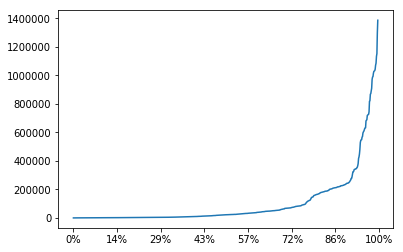

In [115]:
topareas = area_list['area'].sort_values().reset_index()['area'].plot()
topareas.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(area_list['area'])))
plt.show()

In [ ]:
#Can see there's a few images with really large bounding boxes so it's hard to see what threshold is optimal.
#Focus on the top 15% (1047 images) to get a better idea of what threshold to use - we want to find the images
#with the smallest bounding boxes as these would be earliest possible sign of smoke detection

In [116]:
top_perc = 0.14
top_perc_df = pd.DataFrame(area_list.sort_values('area')[:int(np.round(len(area_list['area'])*top_perc))])
top_perc_df.head()

,fname,area
233,1564869279_+00060.jpg,160.0
103,1564869339_+00120.jpg,273.0
685,1563135083_+00060.jpg,312.0
38,1563122707_+00120.jpg,323.0
156,1563221243_-01560.jpg,360.0


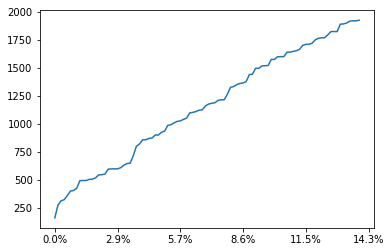

In [118]:
topareas = top_perc_df['area'].sort_values().reset_index()['area'].plot()
topareas.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(area_list['area'])))
plt.show()

In [120]:
#Looks like using around 700 for a cutoff is a good point to caputre the smallest bounding boxes while making
#sure there is enought data to model

0.00015894571940104166

In [139]:
print(top_perc_df.loc[top_perc_df['area'] <= 700, ].shape[0]/area_list.shape[0])
print(top_perc_df.loc[top_perc_df['area'] <= 715, ].shape[0]/area_list.shape[0])
print(top_perc_df.loc[top_perc_df['area'] <= 750, ].shape[0]/area_list.shape[0])

0.03581661891117478
0.03724928366762178
0.03724928366762178


In [177]:
print("""No difference between 715 and 750, so let's use 715 as the threshold. 
This corresponds to approx %s%% of a full size image - Quite small and hopefully representative of very early smoke.
The number of images is %s - This is quite low but should be enough with augementation hopefully
"""%(np.round((715/(2048*3072))*100,2),top_perc_df.loc[top_perc_df['area'] <= 715, ].shape[0]))

No difference between 715 and 750, so let's use 715 as the threshold. 
This corresponds to approx 0.01% of a full size image - Quite small and hopefully representative of very early smoke.
The number of images is 26 - This is quite low but should be enough with augementation hopefully



In [178]:
top_fnames = top_perc_df.loc[top_perc_df['area'] <= 700,'fname']
top_fnames.head()

233    1564869279_+00060.jpg
103    1564869339_+00120.jpg
685    1563135083_+00060.jpg
38     1563122707_+00120.jpg
156    1563221243_-01560.jpg
Name: fname, dtype: object

In [182]:
os.makedirs("WildfireHackathon/EarliestSmokeImages")
os.listdir("WildfireHackathon")

['EarliestSmokeImages']

In [191]:
#Copy images into new folder
in_folder_name = "./Downloads/challenge1/smoke/"
out_folder_name = 'WildfireHackathon/EarliestSmokeImages/'

for f in top_fnames:
    in_name = '%s%s'%(in_folder_name,f)
    out_name = '%s%s'%(out_folder_name,f)
    copyfile(f_name, out_name)

In [192]:
os.listdir("WildfireHackathon/EarliestSmokeImages")

['1563122767_+00180.jpg',
 '1564869579_+00360.jpg',
 '1564869819_+00600.jpg',
 '1563122707_+00120.jpg',
 '1563221183_-01620.jpg',
 '1564869399_+00180.jpg',
 '1564869519_+00300.jpg',
 '1564869339_+00120.jpg',
 '1563135263_+00240.jpg',
 '1563221243_-01560.jpg',
 '1563135203_+00180.jpg',
 '1563135143_+00120.jpg',
 '1563135323_+00300.jpg',
 '1563122827_+00240.jpg',
 '1564869279_+00060.jpg',
 '1528757466_+00060.jpg',
 '1564869459_+00240.jpg',
 '1532544985_+00060.jpg',
 '1563223643_+00840.jpg',
 '1563221303_-01500.jpg',
 '1564869759_+00540.jpg',
 '1563223703_+00900.jpg',
 '1563223583_+00780.jpg',
 '1563223343_+00540.jpg',
 '1563135083_+00060.jpg']